In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [62]:
#load dataset
num_buckets = 5
file_name = "CTMC_QMT_Bucket-" + "05" + ".csv"
df = pd.read_csv(file_name)
df.head()

,State,Start_Time,End_Time,Total_Cars
0,0,0,11,5237
1,1,11,23,15766
2,0,23,31,3258
3,1,31,35,5637
4,2,35,43,15739


In [63]:
#MLE for the lambda parameters
def MLE_lambda_np(df):
    total_time = np.zeros(num_buckets)
    total_occurrences = np.zeros(num_buckets)

    for _, row in df.iterrows():
        state = row['State']
        time_in_state = row["End_Time"] - row["Start_Time"]
        total_time[state] += time_in_state
        total_occurrences[state] += 1

    lambda_parameters = total_occurrences / total_time
    return lambda_parameters

#MLE for the transition matrix
def MLE_transition_matrix_np(df):
    transition_matrix = np.zeros((num_buckets, num_buckets))

    for index, row in df.iterrows():
        if index != len(df) - 1:
            start_state = row['State']
            end_state = df.iloc[index + 1]['State']
            transition_matrix[start_state, end_state] += 1

    for i in range(num_buckets):
        transition_matrix[i] /= np.sum(transition_matrix[i])

    return transition_matrix

[0.16797951 0.38206415 0.27447872 0.55662235 0.46984225]
[[0.   0.94 0.06 0.   0.  ]
 [0.5  0.   0.39 0.11 0.  ]
 [0.   0.48 0.   0.45 0.07]
 [0.   0.01 0.74 0.   0.25]
 [0.   0.   0.09 0.91 0.  ]]


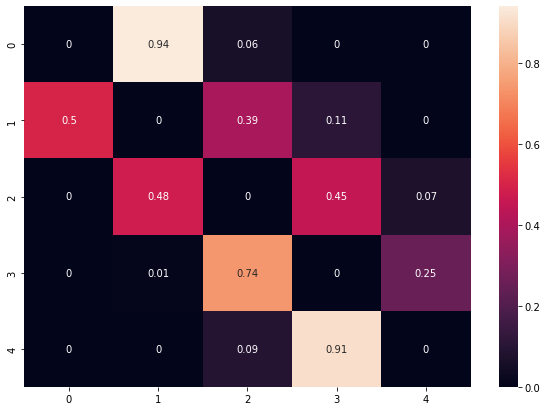

In [64]:
lambda_parameters = MLE_lambda_np(df)
print(lambda_parameters)

transition_matrix = MLE_transition_matrix_np(df)
transition_matrix = np.round(transition_matrix, 2)
print(transition_matrix)


#plot transition matrix
plt.figure(figsize=(10, 7))
sns.heatmap(transition_matrix, annot=True)
#make the heatmap bigger
plt.show()



In [65]:
#greatest value in the transition matrix
max_val = np.max(transition_matrix)
print(max_val)


0.94


In [66]:
#create Q matrix where Qij = lambda_i * Pij if i != j and Qii = -lambda_i
def create_Q(lambda_parameters, transition_matrix):
    Q = np.zeros((num_buckets, num_buckets))
    for i in range(num_buckets):
        for j in range(num_buckets):
            if i != j:
                Q[i, j] = lambda_parameters[i] * transition_matrix[i, j]
            else:
                Q[i, j] = -lambda_parameters[i]
    return Q

#calculate the stationary distribution
def calculate_stationary_distribution(Q):
    Q = Q.T
    Q[-1] = np.ones(num_buckets)
    b = np.zeros(num_buckets)
    b[-1] = 1
    return np.linalg.solve(Q, b)

Q = create_Q(lambda_parameters, transition_matrix)
stationary_distribution = calculate_stationary_distribution(Q)
print(stationary_distribution)

[0.25383376 0.22320267 0.33745658 0.13247222 0.05303477]


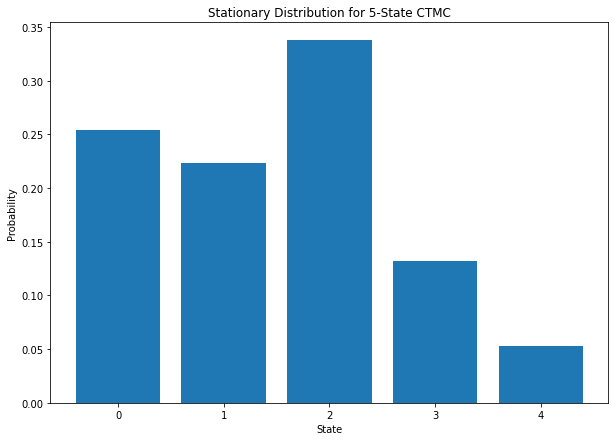

In [67]:
#plot the stationary distribution and include all the ticks on the x-axis
plt.figure(figsize=(10, 7))
plt.bar(range(num_buckets), stationary_distribution)
plt.xticks(range(num_buckets))
plt.title("Stationary Distribution for 5-State CTMC")
plt.xlabel("State")
plt.ylabel("Probability")
plt.show()
